In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import cross_val_score


In [155]:
df_data=pd.read_csv("trainknn.csv")

In [156]:
df_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [157]:
df_data.shape

(196, 10)

In [158]:
df_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,1.518295,13.375204,2.758980,1.454337,72.635408,0.519388,8.910714,0.164235,0.050255,2.668367
std,0.003055,0.783145,1.392641,0.491688,0.763578,0.672703,1.421490,0.485198,0.086359,2.062416
min,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516458,12.877500,2.362500,1.190000,72.317500,0.140000,8.220000,0.000000,0.000000,1.000000
50%,1.517630,13.280000,3.480000,1.360000,72.810000,0.560000,8.575000,0.000000,0.000000,2.000000
75%,1.518985,13.792500,3.610000,1.622500,73.080000,0.610000,9.092500,0.000000,0.090000,3.000000
max,1.533930,15.790000,4.490000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


In [159]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 10 columns):
RI      196 non-null float64
Na      196 non-null float64
Mg      196 non-null float64
Al      196 non-null float64
Si      196 non-null float64
K       196 non-null float64
Ca      196 non-null float64
Ba      196 non-null float64
Fe      196 non-null float64
Type    196 non-null int64
dtypes: float64(9), int64(1)
memory usage: 15.4 KB


# checking data types

In [160]:
df_data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

# Data PreProcessing:

In [161]:
df_data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

There are no null values present in this dataset.

In [162]:
df_data[df_data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [163]:
df_data.drop_duplicates(keep="last",inplace=True)

In [164]:
df_data.shape

(195, 10)

In [165]:
df_data[df_data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


# Exploratory Data Analysis:

# Univariate Analysis:

In [166]:
df_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [167]:
df_data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [168]:
df_data["Type"].value_counts()

2    73
1    66
7    26
3    14
5    10
6     6
Name: Type, dtype: int64

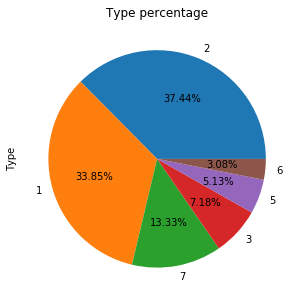

In [169]:
plt.figure(1, figsize=(5,5))
plt.title("Type percentage")
df_data['Type'].value_counts().plot.pie(autopct="%0.2f%%")

In [170]:
columns= [
    'RI',
    'Na',
    'Mg',
    'Al',
    'Si',
    'K',
    'Ca',
    'Ba',
    'Fe'
]

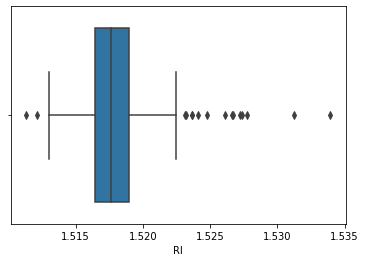

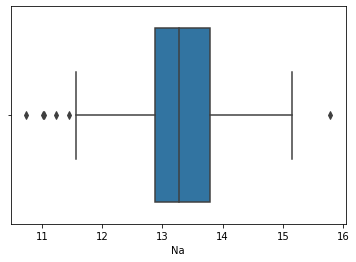

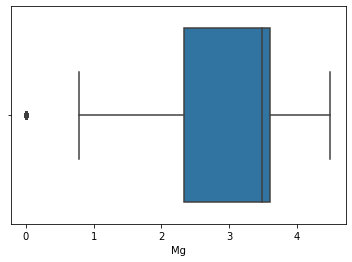

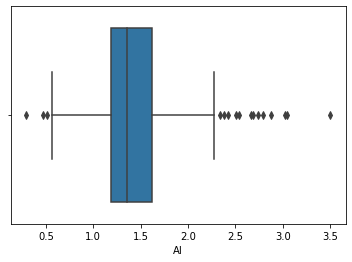

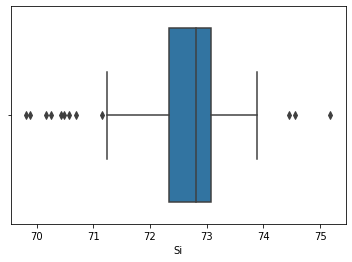

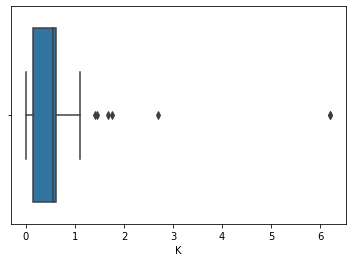

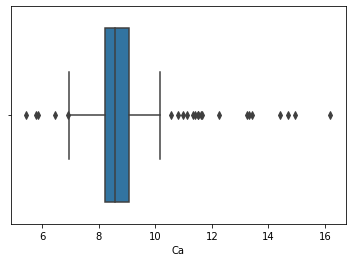

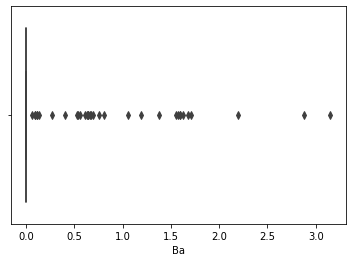

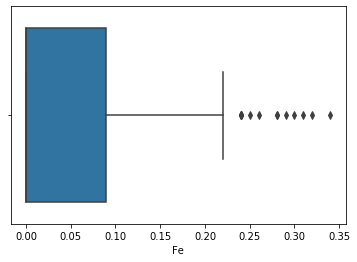

In [171]:
for i in df_data[columns].columns:
    sns.boxplot(df_data[columns][i])
    plt.xlabel(i)
    plt.show()

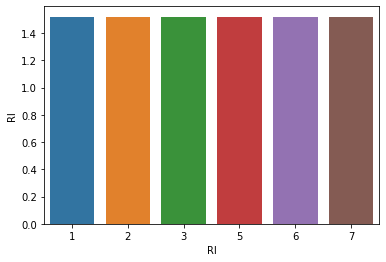

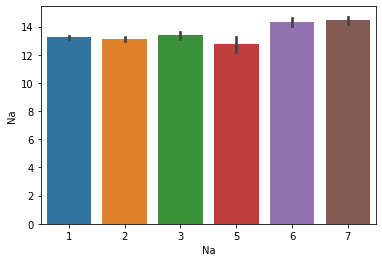

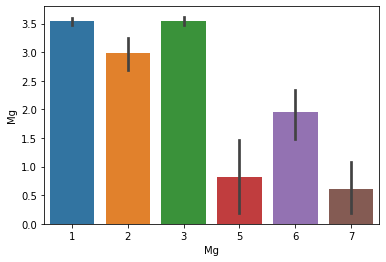

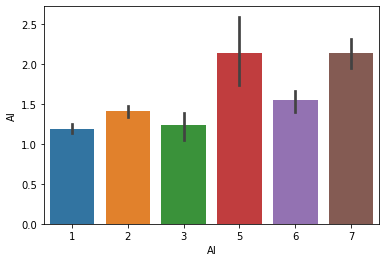

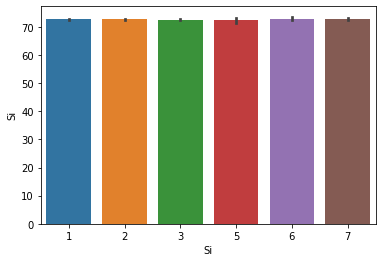

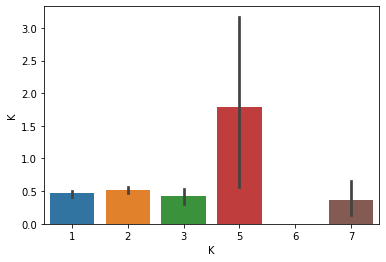

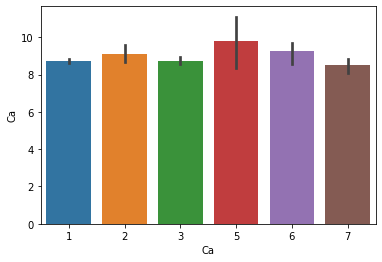

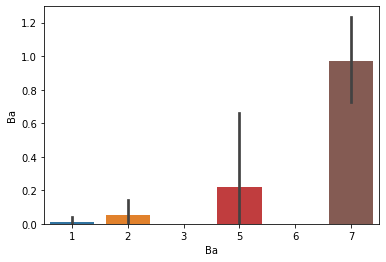

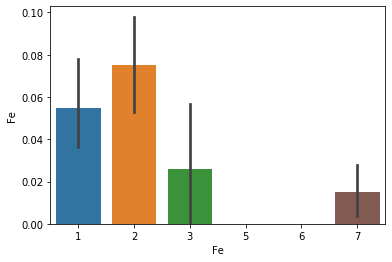

In [172]:
for i in df_data[columns].columns:
    sns.barplot(y=df_data[columns][i],x=df_data["Type"])
    plt.xlabel(i)
    plt.show()

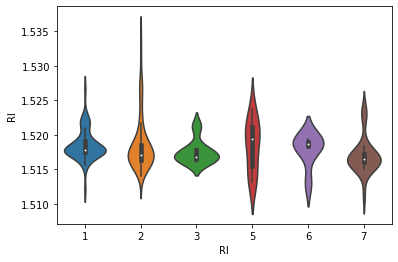

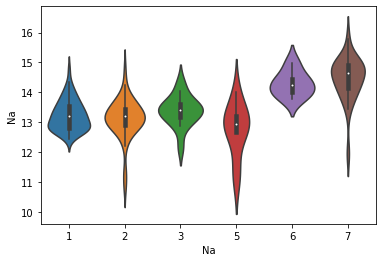

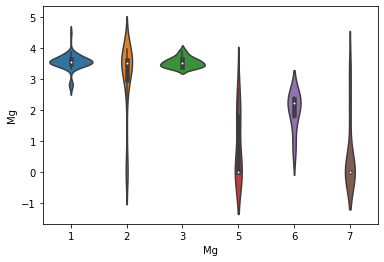

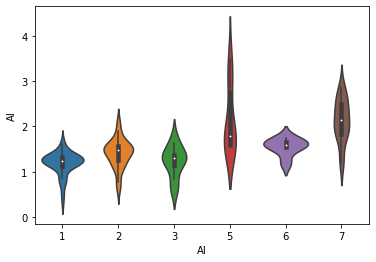

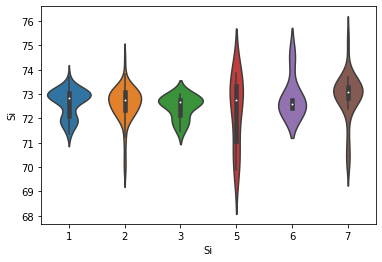

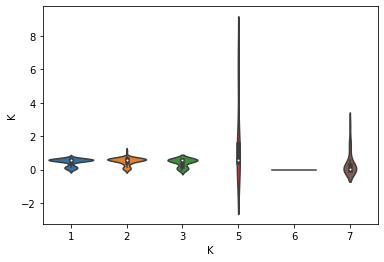

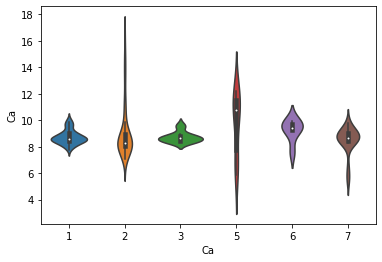

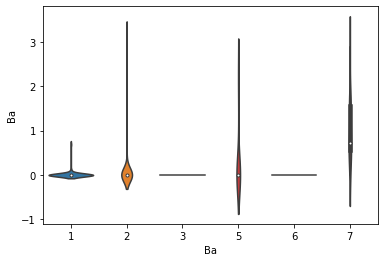

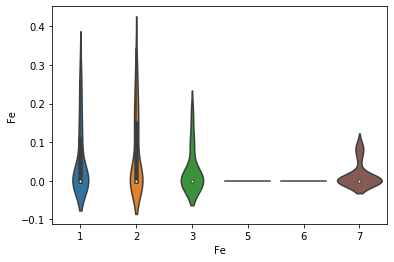

In [173]:
for i in df_data[columns].columns:
    sns.violinplot(x=df_data["Type"],y=df_data[columns][i])
    plt.xlabel(i)
    plt.show()

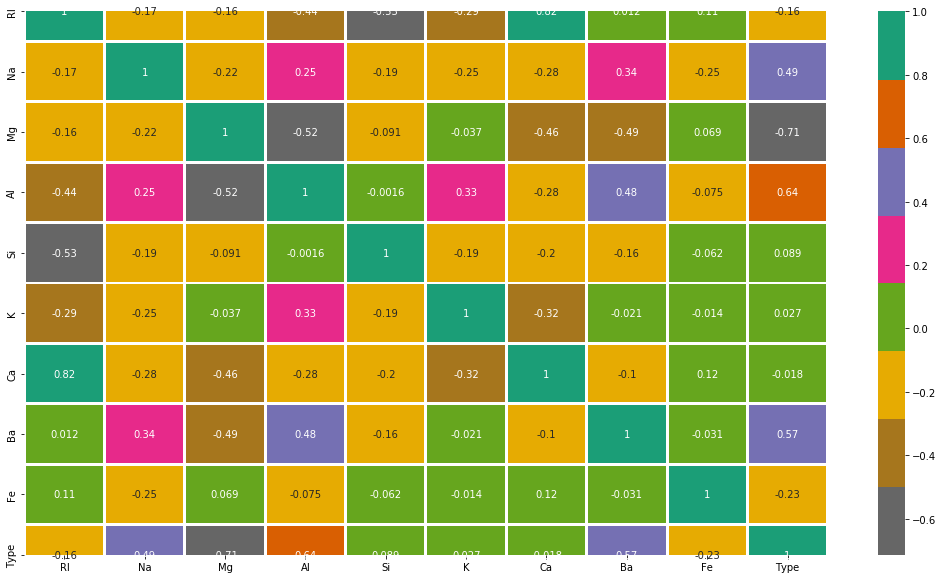

In [174]:
plt.figure(figsize=(18,10))
sns.heatmap(df_data.corr(),annot=True,cmap='Dark2_r', linewidths = 2)

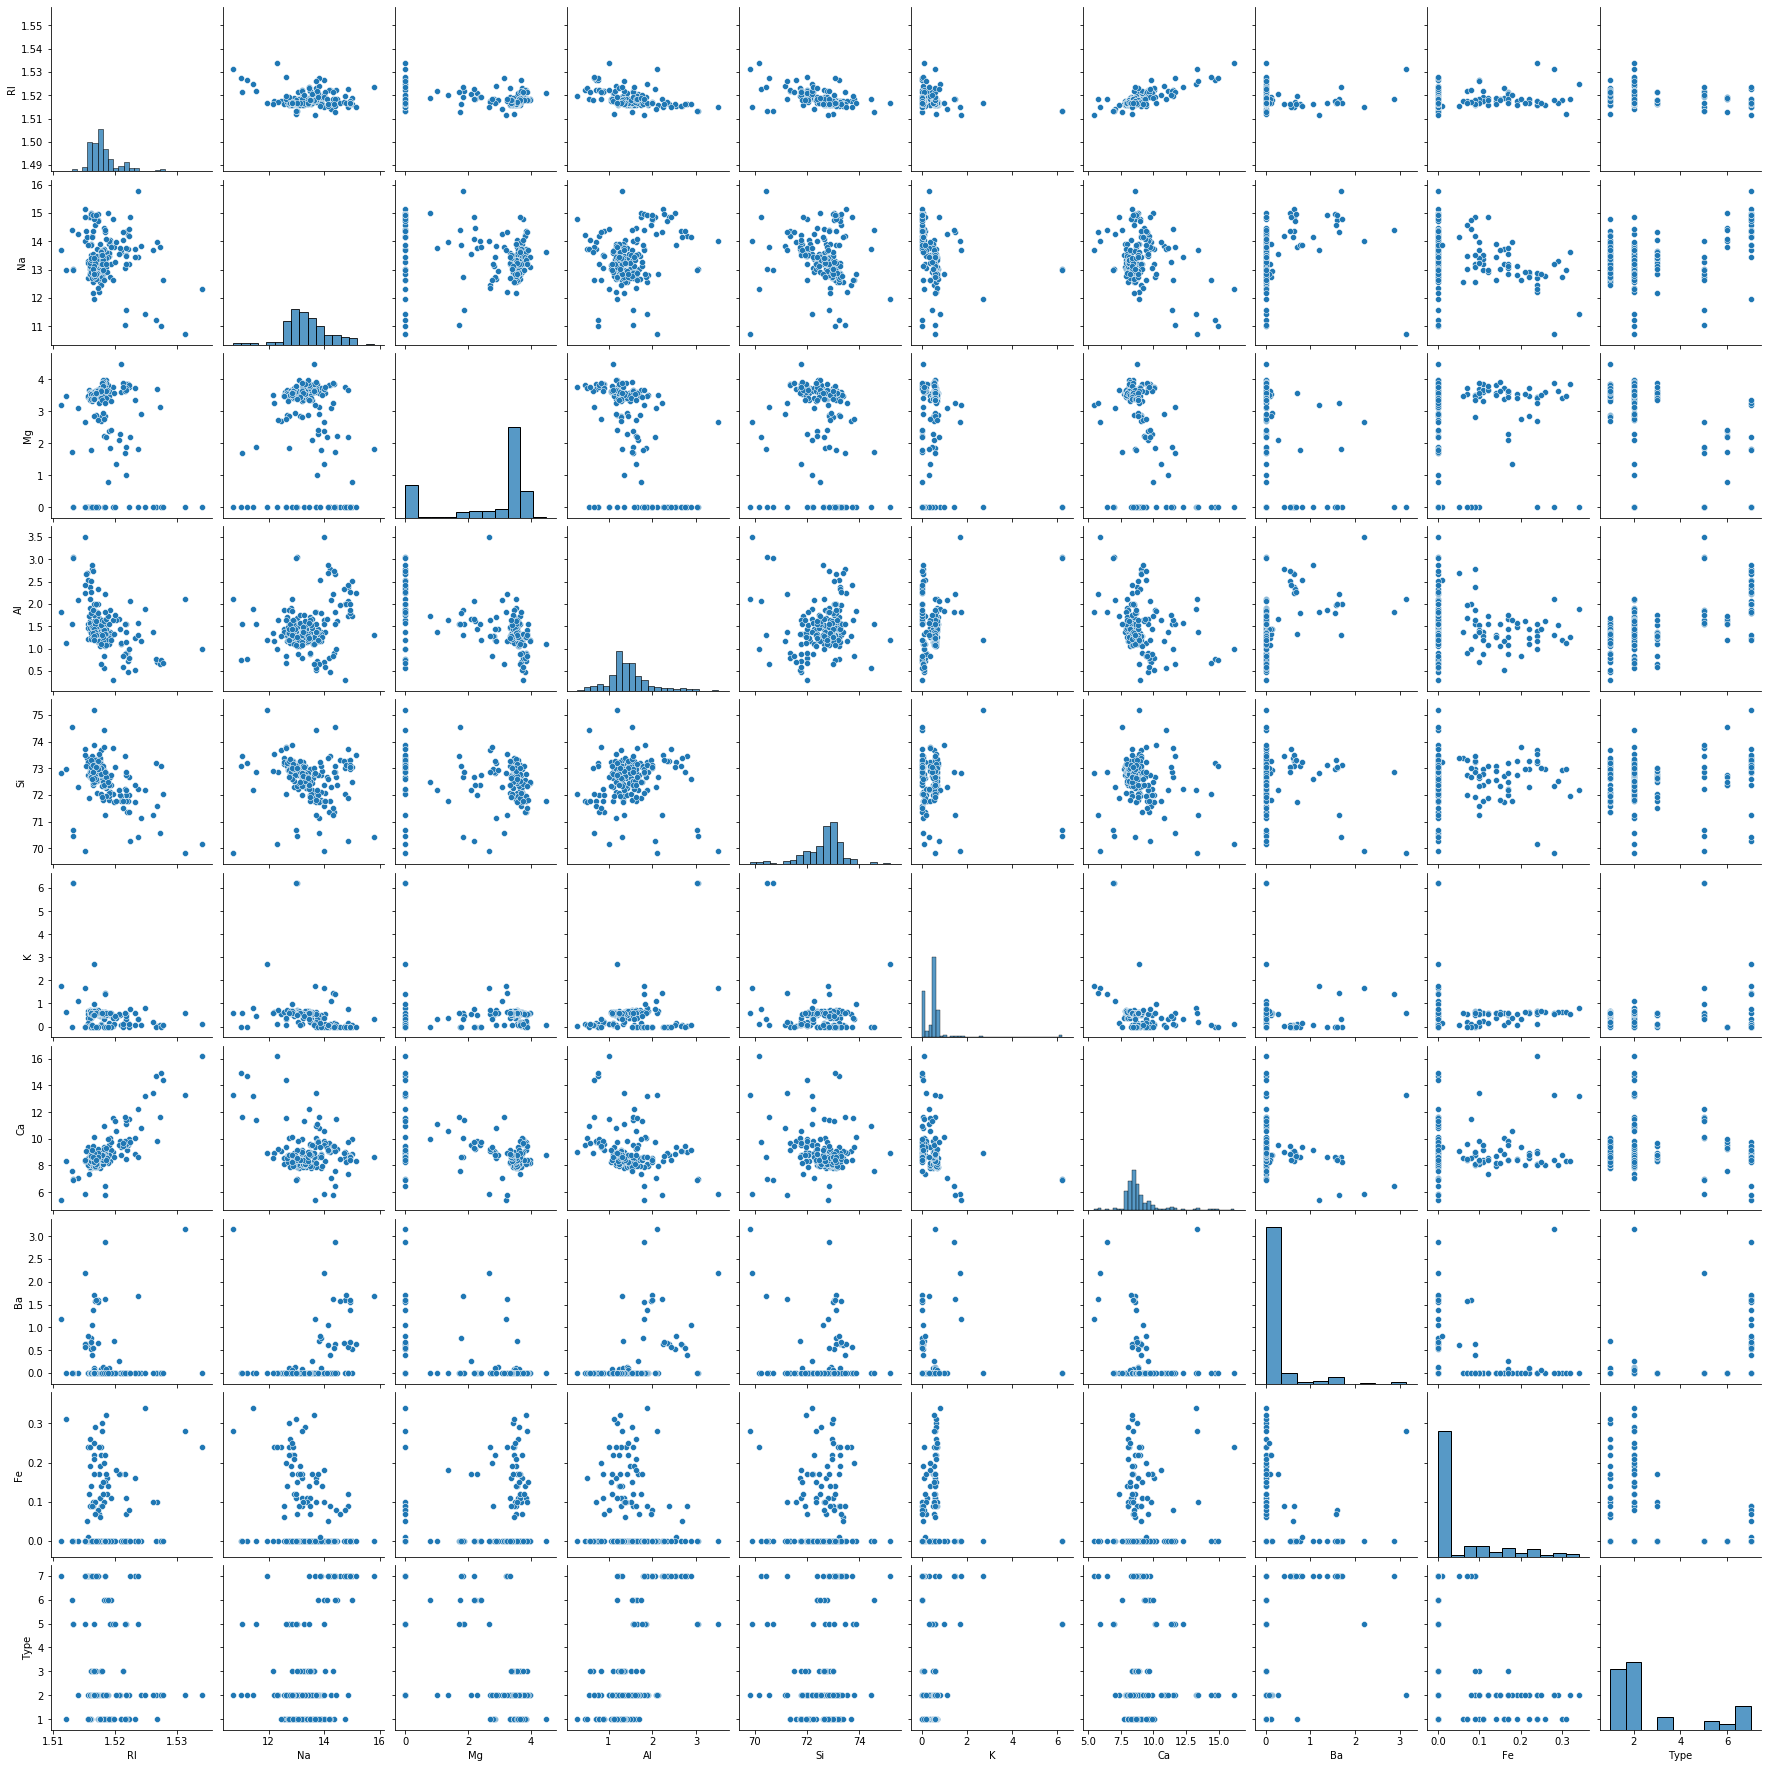

In [175]:
sns.pairplot(df_data)

# Outlier Treatment using IQR

In [176]:
df_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [177]:
# def outlier_treatment(datacolumn):
#  sorted(datacolumn)
#  Q1,Q3 = np.percentile(datacolumn , [25,75])
#  IQR = Q3-Q1
#  lower_range = Q1 - (1.5 * IQR)
#  upper_range = Q3 + (1.5 * IQR)
#  return lower_range,upper_range

In [178]:
# lowerbound,upperbound = outlier_treatment(df_data["RI"])
# df_data[(df_data.RI < lowerbound) | (df_data.RI > upperbound)].shape

In [179]:
# df_data.drop(df_data[(df_data.RI < lowerbound) | (df_data.RI > upperbound)].index , inplace=True)

In [180]:
df_data.shape

(195, 10)

In [181]:
# lowerbound,upperbound = outlier_treatment(df_data["Na"])
# df_data[(df_data.Na < lowerbound) | (df_data.Na > upperbound)].shape
# df_data.drop(df_data[(df_data.Na < lowerbound) | (df_data.Na > upperbound)].index , inplace=True)

In [182]:
# lowerbound,upperbound = outlier_treatment(df_data["Al"])
# df_data[(df_data.Al < lowerbound) | (df_data.Al > upperbound)].shape
# df_data.drop(df_data[(df_data.Al < lowerbound) | (df_data.Al > upperbound)].index , inplace=True)

In [183]:
# lowerbound,upperbound = outlier_treatment(df_data["Si"])
# df_data[(df_data.Si < lowerbound) | (df_data.Si > upperbound)].shape
# df_data.drop(df_data[(df_data.Si < lowerbound) | (df_data.Si > upperbound)].index , inplace=True)

In [184]:
# lowerbound,upperbound = outlier_treatment(df_data["K"])
# df_data[(df_data.K < lowerbound) | (df_data.K > upperbound)].shape
# df_data.drop(df_data[(df_data.K < lowerbound) | (df_data.K > upperbound)].index , inplace=True)

In [185]:
# lowerbound,upperbound = outlier_treatment(df_data["Ca"])
# df_data[(df_data.Ca < lowerbound) | (df_data.Ca > upperbound)].shape
# df_data.drop(df_data[(df_data.Ca < lowerbound) | (df_data.Ca > upperbound)].index , inplace=True)

In [186]:
# lowerbound,upperbound = outlier_treatment(df_data["Ba"])
# df_data[(df_data.Ba < lowerbound) | (df_data.Ba > upperbound)].shape
# df_data.drop(df_data[(df_data.Ba < lowerbound) | (df_data.Ba > upperbound)].index , inplace=True)

In [187]:
# lowerbound,upperbound = outlier_treatment(df_data["Fe"])
# df_data[(df_data.Fe < lowerbound) | (df_data.Fe > upperbound)].shape
# df_data.drop(df_data[(df_data.Fe < lowerbound) | (df_data.Fe > upperbound)].index , inplace=True)

In [188]:
df_data.shape

(195, 10)

In [189]:
y_train = df_data['Type']
X_train = df_data.iloc[:,0:9]

In [190]:
X_train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [191]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [192]:
# print(f'Total # of sample in whole dataset: {len(X)}')
print(X_train.shape)
# print(X_test.shape)
print(y_train.shape)
# print(Y_test.shape)

(195, 9)
(195,)


In [193]:
X_train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [194]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
# X_test = ss.transform(X_test)

In [195]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4, metric = 'euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [196]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [197]:
print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, y_train)*100)

[1]K Nearest Neighbor Training Accuracy: 79.48717948717949


In [198]:
new_df=pd.read_csv("testKNN.csv")

In [199]:
new_df.shape

(18, 10)

In [200]:
y_test = new_df['Type']
X_test = new_df.iloc[:,0:9]

In [201]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_test = ss.fit_transform(X_test)

In [202]:
X_test.shape

(18, 9)

In [203]:
# Predicting the Test set results
y_pred = knn.predict(X_test)

In [204]:
y_pred

array([1, 1, 1, 2, 2, 2, 2, 2, 1, 5, 2, 5, 6, 2, 7, 7, 7, 7], dtype=int64)

In [205]:
y_test

0     1
1     1
2     1
3     2
4     2
5     2
6     3
7     3
8     3
9     5
10    5
11    5
12    6
13    6
14    6
15    7
16    7
17    7
Name: Type, dtype: int64

In [206]:
from sklearn.metrics import accuracy_score
accu = accuracy_score(y_test, y_pred)

In [207]:
accu

0.6666666666666666

In [208]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           2       0.43      1.00      0.60         3
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       1.00      0.33      0.50         3
           7       0.75      1.00      0.86         3

    accuracy                           0.67        18
   macro avg       0.65      0.67      0.60        18
weighted avg       0.65      0.67      0.60        18



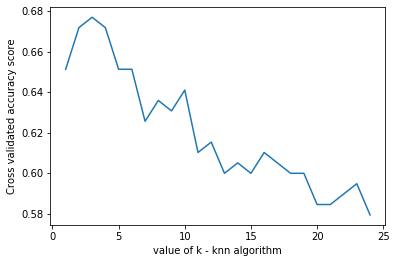

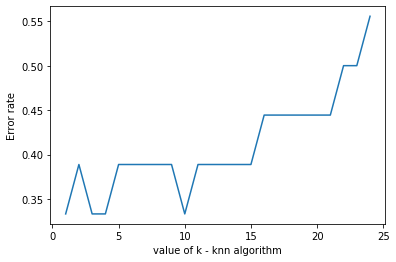

In [209]:
k_range = range(1,25)
k_scores = []
error_rate =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #kscores - accuracy
    scores = cross_val_score(knn,X_train,df_data['Type'],cv=5,scoring='accuracy')
    k_scores.append(scores.mean())
    
    #error rate
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred!=y_test))

#plot k vs accuracy
plt.plot(k_range,k_scores)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Cross validated accuracy score')
plt.show()

#plot k vs error rate
plt.plot(k_range,error_rate)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Error rate')
plt.show()


In [210]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors = 4, metric = 'manhattan')
knn1.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [211]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [212]:
print('[1]K Nearest Neighbor Training Accuracy:', knn1.score(X_train, y_train)*100)

[1]K Nearest Neighbor Training Accuracy: 79.48717948717949


In [213]:
# Predicting the Test set results
y_pred = knn1.predict(X_test)

In [214]:
y_pred

array([1, 1, 1, 2, 2, 1, 2, 2, 1, 5, 2, 5, 6, 6, 2, 7, 7, 7], dtype=int64)

In [215]:
from sklearn.metrics import accuracy_score
accu = accuracy_score(y_test, y_pred)

In [216]:
accu

0.6666666666666666

In [217]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.60      1.00      0.75         3
           2       0.33      0.67      0.44         3
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         3

    accuracy                           0.67        18
   macro avg       0.66      0.67      0.63        18
weighted avg       0.66      0.67      0.63        18

